In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed = 100

## Load data

In [21]:
standing_jen = pd.read_csv(r'../datasets/raw_data/standing_jen.csv')
standing_shreya = pd.read_csv(r'../datasets/raw_data/standing_shreya.csv')
standing_sirui = pd.read_csv(r'../datasets/raw_data/standing_sirui.csv')
standing_benita = pd.read_csv(r'../datasets/raw_data/standing_benita.csv')
standing_nguyen = pd.read_csv(r'../datasets/raw_data/standing_nguyen.csv')

standing_jen["User"] = 1
standing_shreya["User"] = 2
standing_sirui["User"] = 3
standing_benita["User"] = 4
standing_nguyen["User"] = 5

standing_all = standing_jen[:100].append(standing_shreya[:100], ignore_index=True).append(standing_benita[:100], ignore_index=True).append(standing_nguyen[:100], ignore_index=True).append(standing_sirui[:100], ignore_index=True)

standing_all.shape

standing_all["Activity"] = 0

In [22]:
gyro_scale = 500.0/65536.0
acc_scale = 8.0/32768.0

standing_all.iloc[:, 3:6] = acc_scale * standing_all.iloc[:, 3:6]
standing_all.iloc[:, 9:12] = acc_scale * standing_all.iloc[:, 9:12]
standing_all.iloc[:, 0:3] = gyro_scale * standing_all.iloc[:, 0:3]
standing_all.iloc[:, 6:9] = gyro_scale * standing_all.iloc[:, 6:9]

In [4]:
standing_all.head()

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,A2Y,A2Z,timestamp,User,Activity
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.637247e+12,1,0
1,0.381470,0.083923,1.319885,0.000244,0.009521,0.000732,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.637247e+12,1,0
2,0.358582,0.045776,1.564026,0.000244,0.057129,0.000732,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.637247e+12,1,0
3,1.861572,0.030518,1.464844,0.000000,0.032471,0.000732,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.637247e+12,1,0
4,0.808716,1.945496,0.740051,0.000244,0.013672,0.000244,1.586914,1.945496,1.12915,0.0,0.048584,0.0,1.637247e+12,1,0


In [23]:
jumping_jen = pd.read_csv(r'../datasets/cleaned_data/jen_jumping_cleaned.csv')
jumping_shreya = pd.read_csv(r'../datasets/cleaned_data/shreya_jumping_cleaned.csv')
jumping_sirui = pd.read_csv(r'../datasets/cleaned_data/sirui_jumping_cleaned.csv')
jumping_benita = pd.read_csv(r'../datasets/cleaned_data/benita_jumping_cleaned.csv')
jumping_nguyen = pd.read_csv(r'../datasets/cleaned_data/nguyen_jumping_cleaned.csv')

jumping_jen["User"] = 1
jumping_shreya["User"] = 2
jumping_sirui["User"] = 3
jumping_benita["User"] = 4
jumping_nguyen["User"] = 5

jumping_all = jumping_jen.append(jumping_shreya, ignore_index=True).append(jumping_benita, ignore_index=True).append(jumping_nguyen, ignore_index=True).append(jumping_sirui, ignore_index=True)

jumping_all.shape

jumping_all["Activity"] = 2

standing_all.head()

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,A2Y,A2Z,timestamp,User,Activity
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.637247e+12,1,0
1,0.381470,0.083923,1.319885,0.000244,0.009521,0.000732,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.637247e+12,1,0
2,0.358582,0.045776,1.564026,0.000244,0.057129,0.000732,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.637247e+12,1,0
3,1.861572,0.030518,1.464844,0.000000,0.032471,0.000732,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.637247e+12,1,0
4,0.808716,1.945496,0.740051,0.000244,0.013672,0.000244,1.586914,1.945496,1.12915,0.0,0.048584,0.0,1.637247e+12,1,0


In [24]:
running_jen = pd.read_csv(r'../datasets/cleaned_data/jen_running_cleaned.csv')
running_shreya = pd.read_csv(r'../datasets/cleaned_data/shreya_running_cleaned.csv')
running_sirui = pd.read_csv(r'../datasets/cleaned_data/sirui_running_cleaned.csv')
running_benita = pd.read_csv(r'../datasets/cleaned_data/benita_running_cleaned.csv')
running_nguyen = pd.read_csv(r'../datasets/cleaned_data/nguyen_running_cleaned.csv')

running_jen["User"] = 1
running_shreya["User"] = 2
running_sirui["User"] = 3
running_benita["User"] = 4
running_nguyen["User"] = 5

running_all = running_jen.append(running_shreya, ignore_index=True).append(running_benita, ignore_index=True).append(running_nguyen, ignore_index=True).append(running_sirui, ignore_index=True)

running_all.shape

running_all["Activity"] = 3

In [25]:
walking_jen = pd.read_csv(r'../datasets/cleaned_data/jen_walking_cleaned.csv')
walking_shreya = pd.read_csv(r'../datasets/cleaned_data/shreya_walking_cleaned.csv')
walking_sirui = pd.read_csv(r'../datasets/cleaned_data/sirui_walking_cleaned.csv')
walking_benita = pd.read_csv(r'../datasets/cleaned_data/benita_walking_cleaned.csv')
walking_nguyen = pd.read_csv(r'../datasets/cleaned_data/nguyen_walking_cleaned.csv')

walking_jen["User"] = 1
walking_shreya["User"] = 2
walking_sirui["User"] = 3
walking_benita["User"] = 4
walking_nguyen["User"] = 5

walking_all = walking_jen.append(walking_shreya, ignore_index=True).append(walking_benita, ignore_index=True).append(walking_nguyen, ignore_index=True).append(walking_sirui, ignore_index=True)

walking_all.shape

walking_all["Activity"] = 1

In [26]:
walking_jen

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,A2Y,A2Z,timestamp,User
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091553,1.815796,0.358582,0.012451,0.026611,0.003906,1.635344e+12,1
1,0.823975,1.937866,1.350403,0.008545,0.027344,0.006836,0.282288,1.258850,1.518250,0.011963,0.014160,0.003418,1.635344e+12,1
2,0.701904,1.693726,0.976562,0.011475,0.035645,0.013672,0.473022,1.327515,0.923157,0.015625,0.039795,0.006104,1.635344e+12,1
3,1.564026,1.762390,0.480652,0.009521,0.050049,0.013916,1.319885,0.038147,1.304626,0.051270,0.004395,0.047852,1.635344e+12,1
4,1.205444,1.449585,0.358582,0.007080,0.015625,0.017334,0.862122,0.473022,0.000000,0.031250,0.031738,0.042236,1.635344e+12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,0.465393,1.846313,0.350952,0.046875,0.047363,0.050049,1.296997,1.876831,0.495911,0.007812,0.015869,0.000977,1.635345e+12,1
461,0.106812,1.731873,0.144958,0.058594,0.058594,0.002197,1.869202,1.762390,1.617432,0.011230,0.001221,0.061768,1.635345e+12,1
462,0.770569,1.548767,1.243591,0.012695,0.008301,0.026367,0.000000,0.976562,1.464844,0.009033,0.032471,0.058594,1.635345e+12,1
463,0.419617,1.533508,0.244141,0.010986,0.062256,0.031006,0.000000,0.976562,0.549316,0.011963,0.036621,0.060303,1.635345e+12,1


In [27]:
act_dict = {0: 'stand',
            1: 'walk',
            2: 'jump',
            3: 'run'}

### Mark actitvities:
Stand: 0
Walking: 1
Jumping: 2
Running: 3

In [28]:
data_all = standing_all.append(walking_all,ignore_index=True).append(running_all, ignore_index=True).append(jumping_all, ignore_index=True)
data_all['label'] =  data_all.Activity.apply(lambda Activity: act_dict[Activity])

In [10]:
data_all

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,A2Y,A2Z,timestamp,User,Activity,label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.637247e+12,1,0,stand
1,0.381470,0.083923,1.319885,0.000244,0.009521,0.000732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.637247e+12,1,0,stand
2,0.358582,0.045776,1.564026,0.000244,0.057129,0.000732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.637247e+12,1,0,stand
3,1.861572,0.030518,1.464844,0.000000,0.032471,0.000732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.637247e+12,1,0,stand
4,0.808716,1.945496,0.740051,0.000244,0.013672,0.000244,1.586914,1.945496,1.129150,0.000000,0.048584,0.000000,1.637247e+12,1,0,stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1.525879,0.091553,1.358032,0.053467,0.052002,0.062256,0.885010,0.114441,0.595093,0.011719,0.020020,0.001953,1.635345e+12,3,2,jump
7480,0.427246,0.183105,1.945496,0.031006,0.011230,0.061523,1.152039,1.884460,0.953674,0.052734,0.037109,0.000732,1.635345e+12,3,2,jump
7481,0.190735,1.281738,1.945496,0.031006,0.026855,0.061279,1.205444,1.609802,0.686646,0.050049,0.000977,0.057861,1.635345e+12,3,2,jump
7482,0.267029,1.510620,1.945496,0.031006,0.041016,0.000732,0.358582,1.892090,0.358582,0.001465,0.047607,0.047607,1.635345e+12,3,2,jump


In [85]:
data_all['label']

0       stand
1       stand
2       stand
3       stand
4       stand
        ...  
7464     jump
7465     jump
7466     jump
7467     jump
7468     jump
Name: label, Length: 7469, dtype: object

In [57]:
data_all

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,...,0.000000000000000000e+00.4,0.000000000000000000e+00.5,1.200000000000000000e+01,2.380000000000000000e+02,4.700000000000000000e+01,5.100000000000000000e+01,1.090000000000000000e+02,1.600000000000000000e+01,1.635344490490000000e+12,label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand
1,0.381470,0.083923,1.319885,0.000244,0.009521,0.000732,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand
2,0.358582,0.045776,1.564026,0.000244,0.057129,0.000732,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand
3,1.861572,0.030518,1.464844,0.000000,0.032471,0.000732,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand
4,0.808716,1.945496,0.740051,0.000244,0.013672,0.000244,1.586914,1.945496,1.129150,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,1.525879,0.091553,1.358032,0.053467,0.052002,0.062256,0.885010,0.114441,0.595093,0.011719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jump
7479,0.427246,0.183105,1.945496,0.031006,0.011230,0.061523,1.152039,1.884460,0.953674,0.052734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jump
7480,0.190735,1.281738,1.945496,0.031006,0.026855,0.061279,1.205444,1.609802,0.686646,0.050049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jump
7481,0.267029,1.510620,1.945496,0.031006,0.041016,0.000732,0.358582,1.892090,0.358582,0.001465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jump


## Data Exploratory Analysis

In [29]:
features = ['G1X', 'G1Y', 'G1Z', 'A1X', 'A1Y', 'A1Z', 'G2X', 'G2Y', 'G2Z', 'A2X', 'A2Y', 'A2Z']
N_FEATURES = 12

In [30]:
def plot_data(start_position, number_of_frames, metrics=features, fourier=False):
    print(f"Looking at {features} for {number_of_frames} from {start_position}")
   
    i, j = 0, 0
    for label in data_all.label.unique():
        mini_df = data_all[data_all['label']==label].iloc[start_position:start_position+number_of_frames].reset_index()
        for feature in features:
            if feature in ['G2X', 'G2Y', 'G2Z', 'A2X', 'A2Y', 'A2Z']:
                axs[i, 1].plot(mini_df[feature])
            else:
                axs[i, 0].plot(mini_df[feature])
                i = i + 1

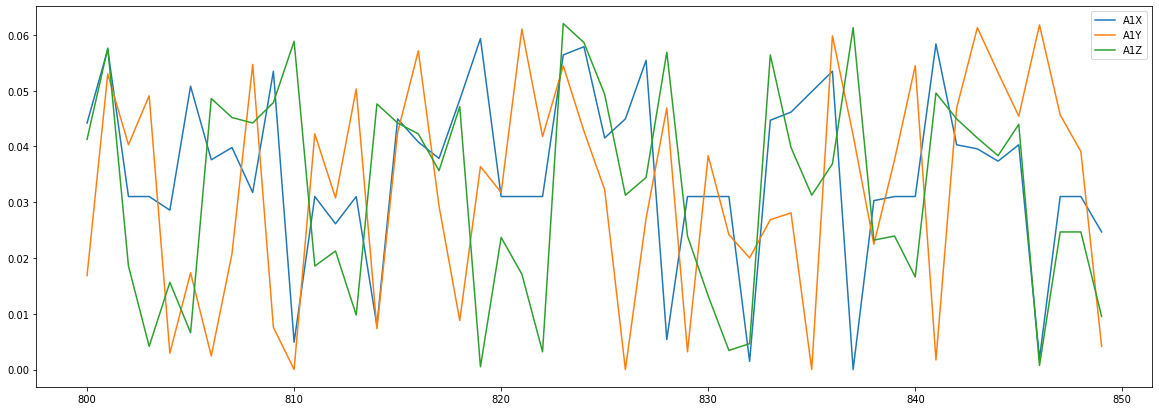

In [31]:
plt.rcParams["figure.figsize"] = (20,7)
jumping_all['A1X'].iloc[800:800+50].plot()
jumping_all['A1Y'].iloc[800:800+50].plot()
jumping_all['A1Z'].iloc[800:800+50].plot()
plt.legend()

# Lowpass Filter

60


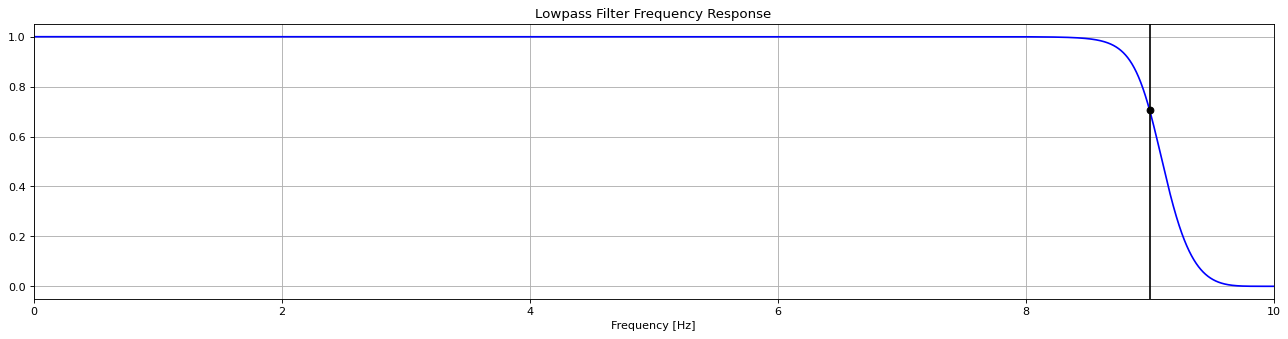

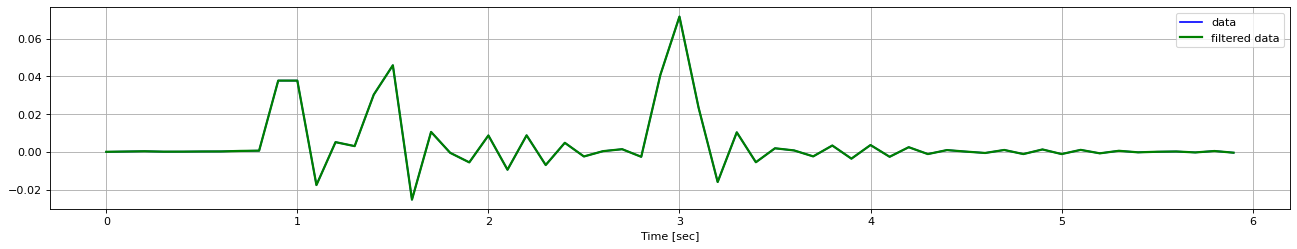

In [45]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

data = data_all['A1X']

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 5
fs = 10     # sample rate, Hz
cutoff = 4  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

plt.figure(figsize=(20, 10), dpi=80)
# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 690         # seconds
n = 6984 # total number of samples
t = np.linspace(0, 6, 60, endpoint=False)
print(len(t))

# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
# data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)


for feature in features:
    if feature in ['A1X', 'A1Y', 'A1Z', 'A2X', 'A2Y', 'A2Z']:
        data_all[feature] = butter_lowpass_filter(data_all[feature], cutoff, fs, order)


plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(2, 1, 2)
data = data
plt.plot(t, data[:60], 'b-', label='data')
plt.plot(t, y[:60], 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=1)
plt.show()

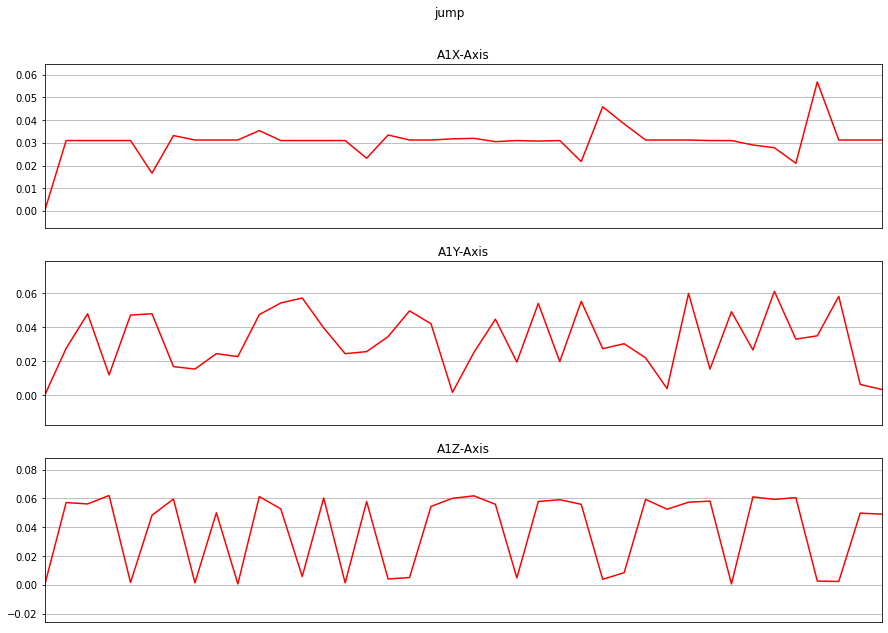

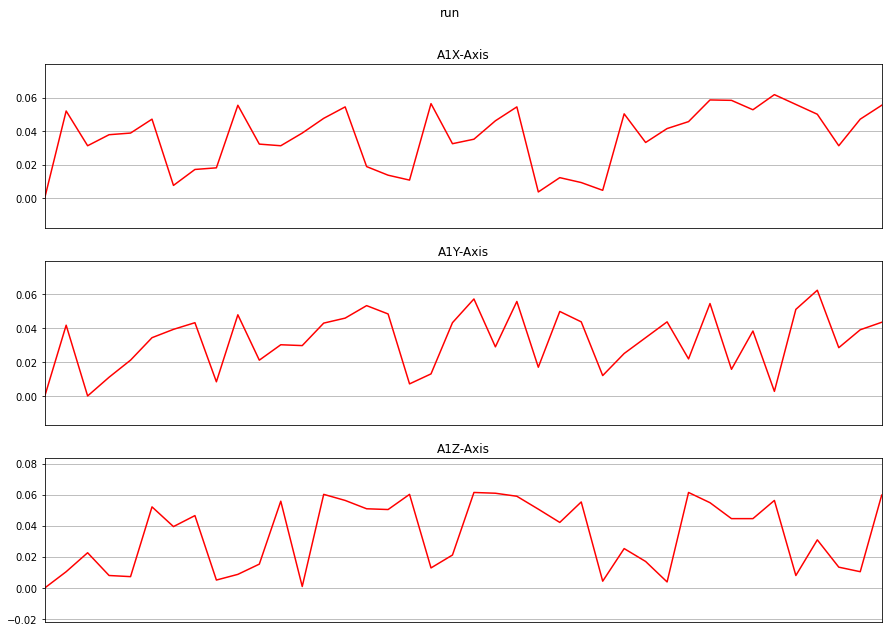

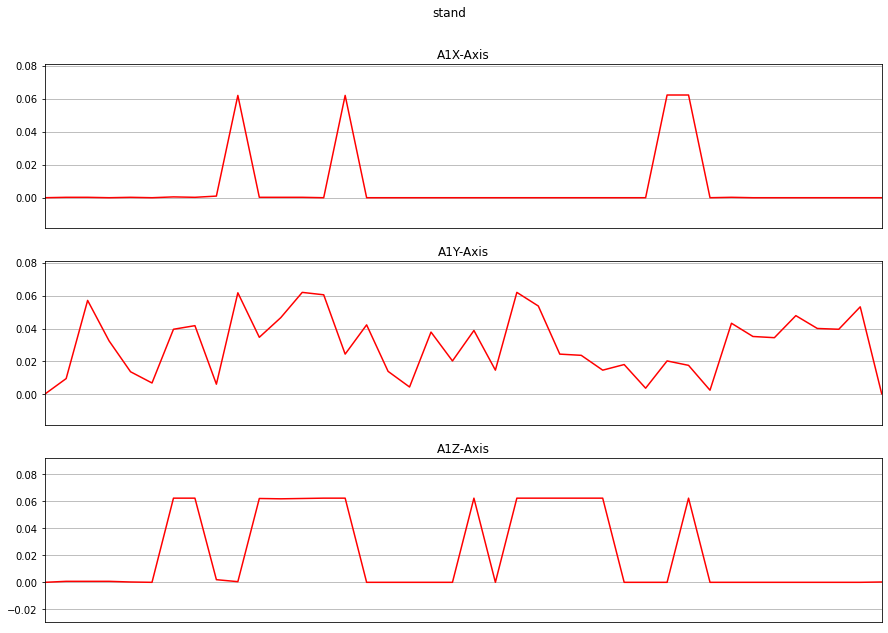

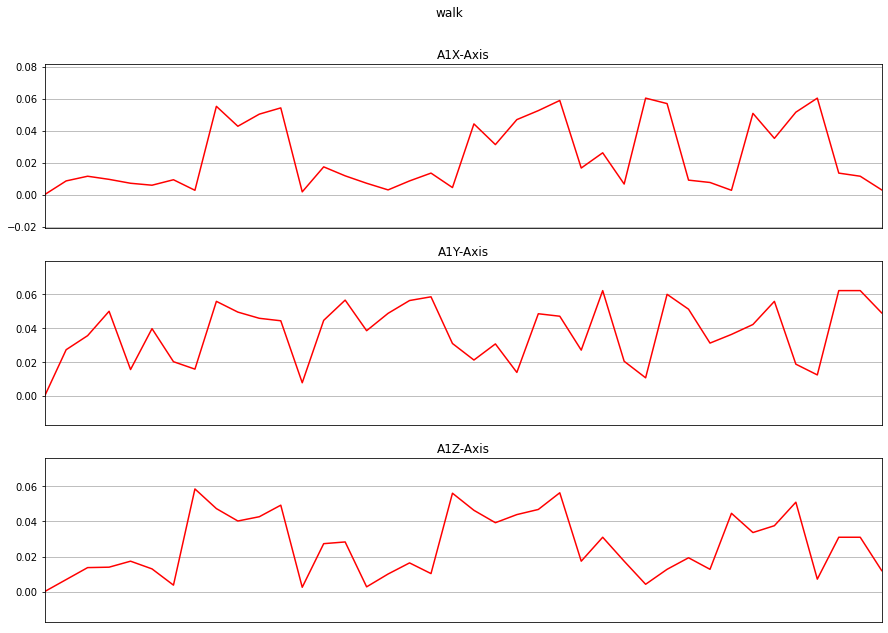

In [14]:
labels = data_all['label']

def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, range(len(data['timestamp'])), data['A1X'], 'A1X-Axis')
    plot_axis(ax1, range(len(data['timestamp'])), data['A1Y'], 'A1Y-Axis')
    plot_axis(ax2, range(len(data['timestamp'])), data['A1Z'], 'A1Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for label in np.unique(labels):
    subset = data_all[data_all['label'] == label][:40]
    plot_activity(label, subset)

In [32]:
data_all

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,A2Y,A2Z,timestamp,User,Activity,label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.637247e+12,1,0,stand
1,0.381470,0.083923,1.319885,0.000244,0.009521,0.000732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.637247e+12,1,0,stand
2,0.358582,0.045776,1.564026,0.000244,0.057129,0.000732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.637247e+12,1,0,stand
3,1.861572,0.030518,1.464844,0.000000,0.032471,0.000732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.637247e+12,1,0,stand
4,0.808716,1.945496,0.740051,0.000244,0.013672,0.000244,1.586914,1.945496,1.129150,0.000000,0.048584,0.000000,1.637247e+12,1,0,stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,1.525879,0.091553,1.358032,0.053467,0.052002,0.062256,0.885010,0.114441,0.595093,0.011719,0.020020,0.001953,1.635345e+12,3,2,jump
7480,0.427246,0.183105,1.945496,0.031006,0.011230,0.061523,1.152039,1.884460,0.953674,0.052734,0.037109,0.000732,1.635345e+12,3,2,jump
7481,0.190735,1.281738,1.945496,0.031006,0.026855,0.061279,1.205444,1.609802,0.686646,0.050049,0.000977,0.057861,1.635345e+12,3,2,jump
7482,0.267029,1.510620,1.945496,0.031006,0.041016,0.000732,0.358582,1.892090,0.358582,0.001465,0.047607,0.047607,1.635345e+12,3,2,jump


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [33]:
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
# data_for_testing[LABEL] = le.fit_transform(data_for_testing['Activity'].values.ravel())
data_all[LABEL] = le.fit_transform(data_all['Activity'].values.ravel())

In [34]:
data_all[LABEL].min()

0

In [35]:
data_all['G1X'].max()

1.9454956

In [36]:
data_all['A1X'].max()

0.06225586

In [37]:
df_test = data_all[data_all['User'] == 5]
df_train = data_all[data_all['User'] != 5]

scales = ['G1X', 'G1Y', 'G1Z', 'G2X', 'G2Y', 'G2Z']

for feature in features:
    if feature in ['A1X', 'A1Y', 'A1Z', 'A2X', 'A2Y', 'A2Z']:
        df_train.loc[:, feature] = df_train[feature] / 0.0623
    else:
        df_test.loc[:, feature] = df_test[feature] / 1.950
            
# Round numbers
round_dict = {feature: 4 for feature in features}
df_train = df_train.round(round_dict)
df_test = df_test.round(round_dict)

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [65]:
df_train.head()

,G1X,G1Y,G1Z,A1X,A1Y,A1Z,G2X,G2Y,G2Z,A2X,...,0.000000000000000000e+00.5,1.200000000000000000e+01,2.380000000000000000e+02,4.700000000000000000e+01,5.100000000000000000e+01,1.090000000000000000e+02,1.600000000000000000e+01,1.635344490490000000e+12,label,ActivityEncoded
0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand,0
1,0.0015,0.0003,0.0052,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand,0
2,0.0014,0.0002,0.0061,0.0,0.0002,0.0,0.0000,0.0000,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand,0
3,0.0073,0.0001,0.0057,0.0,0.0001,0.0,0.0000,0.0000,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand,0
4,0.0032,0.0076,0.0029,0.0,0.0001,0.0,0.0062,0.0076,0.0044,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stand,0


In [38]:
# 2s --> 20 samples
TIME_PERIODS = 20
STEP_DISTANCE = 10

In [39]:
# ORIGINALLLL
def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = len(features)
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    series_list = []
    for i in range(0, len(df) - time_steps, step):
        for feature in features:
            s = df[feature].values[i: i + time_steps]
            series_list.append(s)
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append(series_list)
        series_list = []
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

x_train, y_train = create_segments_and_labels(df_train, TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

x_test, y_test = create_segments_and_labels(df_test, TIME_PERIODS, STEP_DISTANCE, LABEL)


In [40]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

x_train shape:  (598, 20, 12)
598 training samples
y_train shape:  (598,)


In [41]:
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

[0, 1, 2, 3]


In [42]:
input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train shape: (598, 240)
input_shape: 240


## Input shape: 20x12 (20 samples/2s and 12 sensor data)

In [43]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')

In [44]:
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (598, 4)


In [73]:
N_FEATURES = len(features)

model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(Reshape((TIME_PERIODS, N_FEATURES), input_shape=(input_shape,)))
model_m.add(Dense(200, activation='relu'))
model_m.add(Dropout(0.2))
model_m.add(Dense(170, activation='relu'))
model_m.add(Dropout(0.3))
model_m.add(Dense(150, activation='relu'))
model_m.add(Dropout(0.3))
model_m.add(Dense(150, activation='relu'))
model_m.add(Dropout(0.4))
model_m.add(Dense(100, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

2021-11-21 00:17:27.209235: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 20, 12)            0         
_________________________________________________________________
dense (Dense)                (None, 20, 200)           2600      
_________________________________________________________________
dropout (Dropout)            (None, 20, 200)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 20, 170)           34170     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 170)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 20, 150)           25650     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 150)           0

In [76]:
x_train

array([[0.    , 0.0015, 0.0014, ..., 0.    , 0.    , 0.    ],
       [0.004 , 0.0026, 0.0048, ..., 0.    , 0.    , 0.    ],
       [0.0013, 0.0047, 0.0048, ..., 0.    , 0.    , 0.    ],
       ...,
       [0.0012, 0.0048, 0.0044, ..., 0.0002, 0.0002, 0.    ],
       [0.0054, 0.0011, 0.0058, ..., 0.0002, 0.0002, 0.0002],
       [0.0004, 0.0016, 0.0052, ..., 0.    , 0.0002, 0.    ]],
      dtype=float32)

In [45]:
N_FEATURES = len(features)

model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(Reshape((TIME_PERIODS, N_FEATURES), input_shape=(input_shape,)))
model_m.add(Dense(200, activation='relu'))
model_m.add(Dropout(0.2))
model_m.add(Dense(170, activation='relu'))
model_m.add(Dropout(0.4))
model_m.add(Dense(150, activation='relu'))
model_m.add(Dropout(0.5))
model_m.add(Dense(100, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 20, 12)            0         
_________________________________________________________________
dense (Dense)                (None, 20, 200)           2600      
_________________________________________________________________
dropout (Dropout)            (None, 20, 200)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 20, 170)           34170     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 170)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 20, 150)           25650     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 150)           0

2021-11-23 21:07:19.381680: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=3)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 1024
EPOCHS = 200

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

2021-11-23 21:07:22.281169: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 1.4800 - accuracy: 0.1904 - val_loss: 1.4853 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 155ms/step - loss: 1.3197 - accuracy: 0.3536 - val_loss: 1.6833 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 202ms/step - loss: 1.2372 - accuracy: 0.3745 - val_loss: 1.9152 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 177ms/step - loss: 1.2132 - accuracy: 0.3996 - val_loss: 2.0977 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 159ms/step - loss: 1.2259 - accuracy: 0.4163 - val_loss: 2.1404 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 190ms/step - loss: 1.2420 - accuracy: 0.3996 - val_loss: 2.0626 - val_accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 245ms/step - loss: 1.2332 - accuracy: 0.4079 - val_loss: 1.9337 - val_accuracy:

1/1 [==============================] - 0s 197ms/step - loss: 1.0458 - accuracy: 0.5293 - val_loss: 1.5904 - val_accuracy: 0.0000e+00
Epoch 30/200
1/1 [==============================] - 0s 183ms/step - loss: 1.0122 - accuracy: 0.5732 - val_loss: 1.5497 - val_accuracy: 0.0000e+00
Epoch 31/200
1/1 [==============================] - 0s 193ms/step - loss: 0.9955 - accuracy: 0.6067 - val_loss: 1.5158 - val_accuracy: 0.0000e+00
Epoch 32/200
1/1 [==============================] - 0s 175ms/step - loss: 0.9808 - accuracy: 0.5858 - val_loss: 1.4917 - val_accuracy: 0.0000e+00
Epoch 33/200
1/1 [==============================] - 0s 174ms/step - loss: 0.9382 - accuracy: 0.6130 - val_loss: 1.4742 - val_accuracy: 0.0000e+00
Epoch 34/200
1/1 [==============================] - 0s 193ms/step - loss: 0.9055 - accuracy: 0.6276 - val_loss: 1.4847 - val_accuracy: 0.0000e+00
Epoch 35/200
1/1 [==============================] - 0s 191ms/step - loss: 0.8707 - accuracy: 0.6527 - val_loss: 1.5149 - val_accuracy: 0.

Epoch 58/200
1/1 [==============================] - 0s 199ms/step - loss: 0.4080 - accuracy: 0.8452 - val_loss: 0.8829 - val_accuracy: 0.5167
Epoch 59/200
1/1 [==============================] - 0s 170ms/step - loss: 0.4005 - accuracy: 0.8410 - val_loss: 0.7098 - val_accuracy: 0.6333
Epoch 60/200
1/1 [==============================] - 0s 173ms/step - loss: 0.3457 - accuracy: 0.8787 - val_loss: 0.6804 - val_accuracy: 0.6583
Epoch 61/200
1/1 [==============================] - 0s 179ms/step - loss: 0.3747 - accuracy: 0.8661 - val_loss: 0.7103 - val_accuracy: 0.6500
Epoch 62/200
1/1 [==============================] - 0s 163ms/step - loss: 0.3096 - accuracy: 0.8954 - val_loss: 0.7800 - val_accuracy: 0.6250
Epoch 63/200
1/1 [==============================] - 0s 180ms/step - loss: 0.3240 - accuracy: 0.8787 - val_loss: 0.8426 - val_accuracy: 0.5583
Epoch 64/200
1/1 [==============================] - 0s 156ms/step - loss: 0.2863 - accuracy: 0.9142 - val_loss: 0.8066 - val_accuracy: 0.5750
Epoch 

1/1 [==============================] - 0s 166ms/step - loss: 0.1206 - accuracy: 0.9519 - val_loss: 0.4101 - val_accuracy: 0.8417
Epoch 87/200
1/1 [==============================] - 0s 224ms/step - loss: 0.1003 - accuracy: 0.9623 - val_loss: 0.3742 - val_accuracy: 0.8583
Epoch 88/200
1/1 [==============================] - 0s 157ms/step - loss: 0.1019 - accuracy: 0.9540 - val_loss: 0.3305 - val_accuracy: 0.8667
Epoch 89/200
1/1 [==============================] - 0s 178ms/step - loss: 0.0980 - accuracy: 0.9707 - val_loss: 0.3061 - val_accuracy: 0.8750
Epoch 90/200
1/1 [==============================] - 0s 172ms/step - loss: 0.0942 - accuracy: 0.9644 - val_loss: 0.2981 - val_accuracy: 0.8750
Epoch 91/200
1/1 [==============================] - 0s 174ms/step - loss: 0.1150 - accuracy: 0.9623 - val_loss: 0.3307 - val_accuracy: 0.8667
Epoch 92/200
1/1 [==============================] - 0s 173ms/step - loss: 0.0940 - accuracy: 0.9644 - val_loss: 0.3630 - val_accuracy: 0.8500
Epoch 93/200
1/1 [=

Epoch 115/200
1/1 [==============================] - 0s 168ms/step - loss: 0.0673 - accuracy: 0.9749 - val_loss: 0.3772 - val_accuracy: 0.8667
Epoch 116/200
1/1 [==============================] - 0s 165ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.4468 - val_accuracy: 0.8417
Epoch 117/200
1/1 [==============================] - 0s 183ms/step - loss: 0.0845 - accuracy: 0.9623 - val_loss: 0.4597 - val_accuracy: 0.8333
Epoch 118/200
1/1 [==============================] - 0s 165ms/step - loss: 0.0755 - accuracy: 0.9644 - val_loss: 0.3542 - val_accuracy: 0.8583
Epoch 119/200
1/1 [==============================] - 0s 187ms/step - loss: 0.0372 - accuracy: 0.9916 - val_loss: 0.2889 - val_accuracy: 0.8833
Epoch 120/200
1/1 [==============================] - 0s 195ms/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.2654 - val_accuracy: 0.8833
Epoch 121/200
1/1 [==============================] - 0s 166ms/step - loss: 0.0486 - accuracy: 0.9812 - val_loss: 0.2776 - val_accuracy: 0.8833

Epoch 143/200
1/1 [==============================] - 0s 199ms/step - loss: 0.0390 - accuracy: 0.9812 - val_loss: 0.2578 - val_accuracy: 0.8917
Epoch 144/200
1/1 [==============================] - 0s 169ms/step - loss: 0.0361 - accuracy: 0.9895 - val_loss: 0.3106 - val_accuracy: 0.8917
Epoch 145/200
1/1 [==============================] - 0s 165ms/step - loss: 0.0513 - accuracy: 0.9833 - val_loss: 0.3240 - val_accuracy: 0.8917
Epoch 146/200
1/1 [==============================] - 0s 187ms/step - loss: 0.0309 - accuracy: 0.9895 - val_loss: 0.3258 - val_accuracy: 0.8833
Epoch 147/200
1/1 [==============================] - 0s 163ms/step - loss: 0.0325 - accuracy: 0.9916 - val_loss: 0.3400 - val_accuracy: 0.8917
Epoch 148/200
1/1 [==============================] - 0s 180ms/step - loss: 0.0453 - accuracy: 0.9895 - val_loss: 0.3189 - val_accuracy: 0.8917
Epoch 149/200
1/1 [==============================] - 0s 166ms/step - loss: 0.0564 - accuracy: 0.9812 - val_loss: 0.2788 - val_accuracy: 0.9000

Epoch 172/200
1/1 [==============================] - 0s 181ms/step - loss: 0.0129 - accuracy: 0.9979 - val_loss: 0.3260 - val_accuracy: 0.8833
Epoch 173/200
1/1 [==============================] - 0s 164ms/step - loss: 0.0113 - accuracy: 0.9979 - val_loss: 0.3047 - val_accuracy: 0.8917
Epoch 174/200
1/1 [==============================] - 0s 170ms/step - loss: 0.0293 - accuracy: 0.9895 - val_loss: 0.2998 - val_accuracy: 0.8917
Epoch 175/200
1/1 [==============================] - 0s 191ms/step - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.3019 - val_accuracy: 0.8917
Epoch 176/200
1/1 [==============================] - 0s 166ms/step - loss: 0.0239 - accuracy: 0.9937 - val_loss: 0.3083 - val_accuracy: 0.8917
Epoch 177/200
1/1 [==============================] - 0s 182ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.3362 - val_accuracy: 0.8917
Epoch 178/200
1/1 [==============================] - 0s 245ms/step - loss: 0.0165 - accuracy: 0.9958 - val_loss: 0.3783 - val_accuracy: 0.8833

Epoch 200/200
1/1 [==============================] - 0s 162ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.3993 - val_accuracy: 0.8750


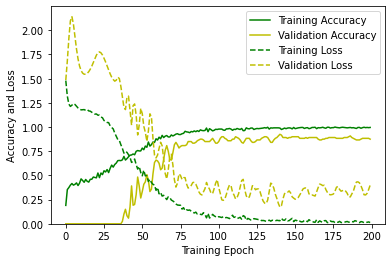

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       0.98      1.00      0.99       186
         2.0       1.00      0.92      0.96       185
         3.0       0.94      1.00      0.97       187

    accuracy                           0.97       598
   macro avg       0.98      0.98      0.98       598
weighted avg       0.98      0.97      0.97       598



In [47]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'y', label='Validation Accuracy')
plt.plot(history.history['loss'], 'g--', label='Training Loss')
plt.plot(history.history['val_loss'], 'y--', label='Validation Loss')
# plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))

In [362]:
model_m.save_weights('example_model_weights.h5')
model_json = model_m.to_json()
with open("example_model.json", "w") as json_file:
    json_file.write(model_json)

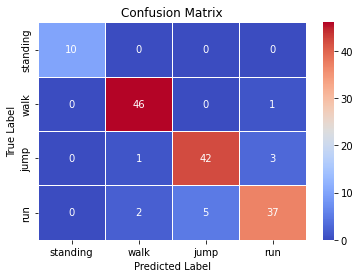

In [397]:
LABELS = ['standing','walk', 'jump', 'run']

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model_m.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
# max_y_test = np.argmax(y_test, axis=1)

show_confusion_matrix(y_test, max_y_pred_test)

# print(classification_report(y_test, max_y_pred_test))

In [69]:
y_pred_test = model_m.predict(np.asarray(x_walk1).reshape((1, 20, 12)))

In [317]:
df_train.head

<bound method NDFrame.head of          G1X     G1Y     G1Z     A1X     A1Y     A1Z     G2X     G2Y     G2Z  \
0     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1     0.1961  0.0431  0.6784  0.0039  0.1529  0.0118  0.0000  0.0000  0.0000   
2     0.1843  0.0235  0.8039  0.0039  0.9176  0.0118  0.0000  0.0000  0.0000   
3     0.9569  0.0157  0.7529  0.0000  0.5216  0.0118  0.0000  0.0000  0.0000   
4     0.4157  1.0000  0.3804  0.0039  0.2196  0.0039  0.8157  1.0000  0.5804   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7652  0.7843  0.0471  0.6980  0.8588  0.8353  1.0000  0.4549  0.0588  0.3059   
7653  0.2196  0.0941  1.0000  0.4980  0.1804  0.9882  0.5922  0.9686  0.4902   
7654  0.0980  0.6588  1.0000  0.4980  0.4314  0.9843  0.6196  0.8275  0.3529   
7655  0.1373  0.7765  1.0000  0.4980  0.6588  0.0118  0.1843  0.9725  0.1843   
7656  0.1059  0.7765  0.9333  0.8471  0.5216  0.3490  0.4745  0.7804  0.1216   

         